<a href="https://colab.research.google.com/github/dmahoner/Final-Exam/blob/main/FinalExam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## EDA

Loading Data set

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore


# Load the Excel file as a DataFrame
file_path = '/content/Dataset_3_zeeolites.xlsx' # Provide the correct file path and name

try:
    df = pd.read_excel(file_path)
except Exception as e:
    print(f"Error reading the Excel file: {e}")

# Display the first few rows of the DataFrame
print(df.head())

   seed  SiO2  NaOH  SDA  B2O3  H2O  seed \namount  temperature\n(°C)  \
0  *MRE     1  0.40  0.3   0.1   25           0.05                150   
1  *MRE     1  0.00  0.0   0.1   25           0.05                150   
2  *MRE     1  0.10  0.0   0.1   25           0.05                150   
3  *MRE     1  0.20  0.0   0.1   25           0.05                150   
4  *MRE     1  0.25  0.0   0.1   25           0.05                150   

   time \n(day) si/al\n(ICP-AES)    fd  class  
0           7.0             infy  19.9      0  
1           7.0             infy  19.9      0  
2           7.0             infy  19.9      0  
3           7.0             infy  19.9      0  
4           7.0             infy  19.9      0  


Checking for missing data

In [ ]:
print("Initial Dataset Info:")
print(df.info())

# Checking for Missing Data
missing_data = df.isnull().sum()
print("\nMissing Data by Column:")
print(missing_data)


Initial Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385 entries, 0 to 384
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   seed              385 non-null    object 
 1   SiO2              385 non-null    int64  
 2   NaOH              385 non-null    float64
 3   SDA               385 non-null    float64
 4   B2O3              385 non-null    float64
 5   H2O               385 non-null    int64  
 6   seed 
amount      385 non-null    float64
 7   temperature
(°C)  385 non-null    int64  
 8   time 
(day)       385 non-null    float64
 9   si/al
(ICP-AES)   385 non-null    object 
 10  fd                385 non-null    float64
 11  class             385 non-null    int64  
dtypes: float64(6), int64(4), object(2)
memory usage: 36.2+ KB
None

Missing Data by Column:
seed                 0
SiO2                 0
NaOH                 0
SDA                  0
B2O3                 0
H2O    

Summary Statistics

In [ ]:
# prompt: print summary_statistics in an organized way

def print_summary_statistics(df):
  """Prints summary statistics for a Pandas DataFrame in an organized way.

  Args:
    df: The Pandas DataFrame to analyze.
  """

  print("Summary Statistics:")
  print("-" * 20)

  # Numerical summary statistics
  print("\nNumerical Columns:")
  print(df.describe())

  # Categorical summary statistics
  print("\nCategorical Columns:")
  for column in df.select_dtypes(include=['object']).columns:
      print(f"\nColumn: {column}")
      print(f"  Unique Values: {df[column].nunique()}")
# prompt: print summary_statistics in an organized way

def print_summary_statistics(df):
  """Prints summary statistics for a Pandas DataFrame in an organized way.

  Args:
    df: The Pandas DataFrame to analyze.
  """

  print("Summary Statistics:")
  print("-" * 20)

  # Numerical summary statistics
  print("\nNumerical Columns:")
  print(df.describe())

  # Categorical summary statistics
  print("\nCategorical Columns:")
  for column in df.select_dtypes(include=['object']).columns:
      print(f"\nColumn: {column}")
      print(f"  Unique Values: {df[column].nunique()}")
      print(f"  Most Frequent Value: {df[column].mode()[0]}")
      print(f"  Frequency of Most Frequent Value: {df[column].value_counts().iloc[0]}")
      print(f"  Count: {df[column].count()}")
print_summary_statistics(df)

Summary Statistics:
--------------------

Numerical Columns:
        SiO2        NaOH         SDA        B2O3         H2O  seed \namount  \
count  385.0  385.000000  385.000000  385.000000  385.000000     385.000000   
mean     1.0    0.429091    0.204416    0.101831   25.122078       0.062468   
std      0.0    0.191140    0.148100    0.037473    2.161008       0.029543   
min      1.0    0.000000    0.000000    0.005000    7.000000       0.050000   
25%      1.0    0.250000    0.000000    0.100000   25.000000       0.050000   
50%      1.0    0.500000    0.300000    0.100000   25.000000       0.050000   
75%      1.0    0.600000    0.300000    0.100000   25.000000       0.050000   
max      1.0    0.800000    0.600000    0.400000   45.000000       0.150000   

       temperature\n(°C)  time \n(day)          fd       class  
count         385.000000    385.000000  385.000000  385.000000  
mean          150.597403      6.077922   18.283377    0.314286  
std             3.907324      1.

One hot encoding

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Define categorical columns to encode
categorical_columns = ['seed', 'si/al']

# Check if all columns exist in the DataFrame
available_columns = [col for col in categorical_columns if col in df.columns]
missing_columns = [col for col in categorical_columns if col not in df.columns]

if missing_columns:
    print(f"Warning: These columns are missing from the DataFrame and will be ignored: {missing_columns}")

# One-hot encode only available columns
if available_columns:
    # Ensure all categorical columns have consistent data types and handle missing values
    df[available_columns] = df[available_columns].astype(str).fillna('missing')

    # Set up the OneHotEncoder
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

    # Fit and transform the categorical columns
    encoded_data = encoder.fit_transform(df[available_columns])

    # Get the feature names for the encoded columns
    encoded_columns = encoder.get_feature_names_out(available_columns)

    # Create a DataFrame from the encoded data
    encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns, index=df.index)

    # Drop the original categorical columns from the DataFrame
    data = df.drop(columns=available_columns)

    # Concatenate the original DataFrame (without categorical columns) with the encoded DataFrame
    data = pd.concat([data, encoded_df], axis=1)

# Save the preprocessed DataFrame as a .pkl file
output_path = "preprocessed_data.pkl"
data.to_pickle(output_path)
print(f"Preprocessed data saved to: {output_path}")

# Display the updated DataFrame
print(data)


Preprocessed data saved to: preprocessed_data.pkl
     SiO2  NaOH  SDA  B2O3  H2O  seed \namount  temperature\n(°C)  \
0       1  0.40  0.3  0.10   25           0.05                150   
1       1  0.00  0.0  0.10   25           0.05                150   
2       1  0.10  0.0  0.10   25           0.05                150   
3       1  0.20  0.0  0.10   25           0.05                150   
4       1  0.25  0.0  0.10   25           0.05                150   
..    ...   ...  ...   ...  ...            ...                ...   
380     1  0.60  0.3  0.10   35           0.05                150   
381     1  0.50  0.3  0.10   25           0.05                150   
382     1  0.50  0.3  0.10   25           0.05                150   
383     1  0.60  0.0  0.10   25           0.05                150   
384     1  0.60  0.3  0.15   25           0.05                150   

     time \n(day) si/al\n(ICP-AES)    fd  class  seed_*MRE  seed_ERI  \
0             7.0             infy  19.9      0  

remove redundant columns

In [ ]:

    # Display the updated DataFrame
    print(data)

# Checking for Redundant Columns (e.g., duplicated columns)
    duplicate_columns = data.columns[data.columns.duplicated()]
    if len(duplicate_columns) > 0:
        print(f"\nRedundant columns found: {list(duplicate_columns)}")
        data = data.loc[:, ~data.columns.duplicated()]
        print("Redundant columns removed.")
    else:
        print("\nNo redundant columns found.")

     SiO2  NaOH  SDA  B2O3  H2O  seed \namount  temperature\n(°C)  \
0       1  0.40  0.3  0.10   25           0.05                150   
1       1  0.00  0.0  0.10   25           0.05                150   
2       1  0.10  0.0  0.10   25           0.05                150   
3       1  0.20  0.0  0.10   25           0.05                150   
4       1  0.25  0.0  0.10   25           0.05                150   
..    ...   ...  ...   ...  ...            ...                ...   
380     1  0.60  0.3  0.10   35           0.05                150   
381     1  0.50  0.3  0.10   25           0.05                150   
382     1  0.50  0.3  0.10   25           0.05                150   
383     1  0.60  0.0  0.10   25           0.05                150   
384     1  0.60  0.3  0.15   25           0.05                150   

     time \n(day) si/al\n(ICP-AES)    fd  class  seed_*MRE  seed_ERI  \
0             7.0             infy  19.9      0        1.0       0.0   
1             7.0          

Remove duplicate columns

In [ ]:
# Check for duplicated columns
duplicate_columns = df.columns[df.columns.duplicated()]
if len(duplicate_columns) > 0:
    print(f"Duplicate columns found: {list(duplicate_columns)}")
    df = df.loc[:, ~df.columns.duplicated()]
    print("Duplicate columns have been removed.")
else:
    print("No duplicate columns found.")

No duplicate columns found.


Identifying and handling outliers

In [ ]:
import pandas as pd

def handle_outliers(data, method='remove', replacement_value=None):  # Define function with default arguments
    """
    Detects and handles outliers in numerical columns of a DataFrame.

    Args:
        data (pd.DataFrame): The DataFrame to process.
        method (str, optional): Method for handling outliers. 'remove' or 'replace'. Defaults to 'remove'.
        replacement_value (any, optional): Value to replace outliers with if method is 'replace'. Defaults to None.

    Returns:
        pd.DataFrame: The DataFrame with outliers handled.
    """

    # Select only numerical columns for outlier detection
    numeric_columns = data.select_dtypes(include=['number']).columns

    if numeric_columns.empty:
        print("No numerical columns found in the data.")
        return data  # Return data if no numerical columns are found

    # Detect and handle outliers for each numerical column
    for column in numeric_columns:  # Ensure iteration over columns
        print(f"\nProcessing column: {column}")

        # Calculate Q1, Q3, and IQR
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1

        # Determine the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers = (data[column] < lower_bound) | (data[column] > upper_bound)
        outlier_count = outliers.sum()
        print(f"Outliers detected: {outlier_count}")

        if outlier_count > 0:
            if method == 'remove':
                # Remove rows containing outliers
                data = data[~outliers]
                print(f"Rows with outliers in '{column}' have been removed.")
            elif method == 'replace' and replacement_value is not None:
                # Replace outliers with a specified value
                data.loc[outliers, column] = replacement_value
                print(f"Outliers in '{column}' have been replaced with {replacement_value}.")
            else:
                print(f"Invalid method or replacement_value not provided for '{column}'. No action taken.")
        else:
            print(f"No outliers found in '{column}'.")

    return data  # Return the modified DataFrame

Creating a heat map

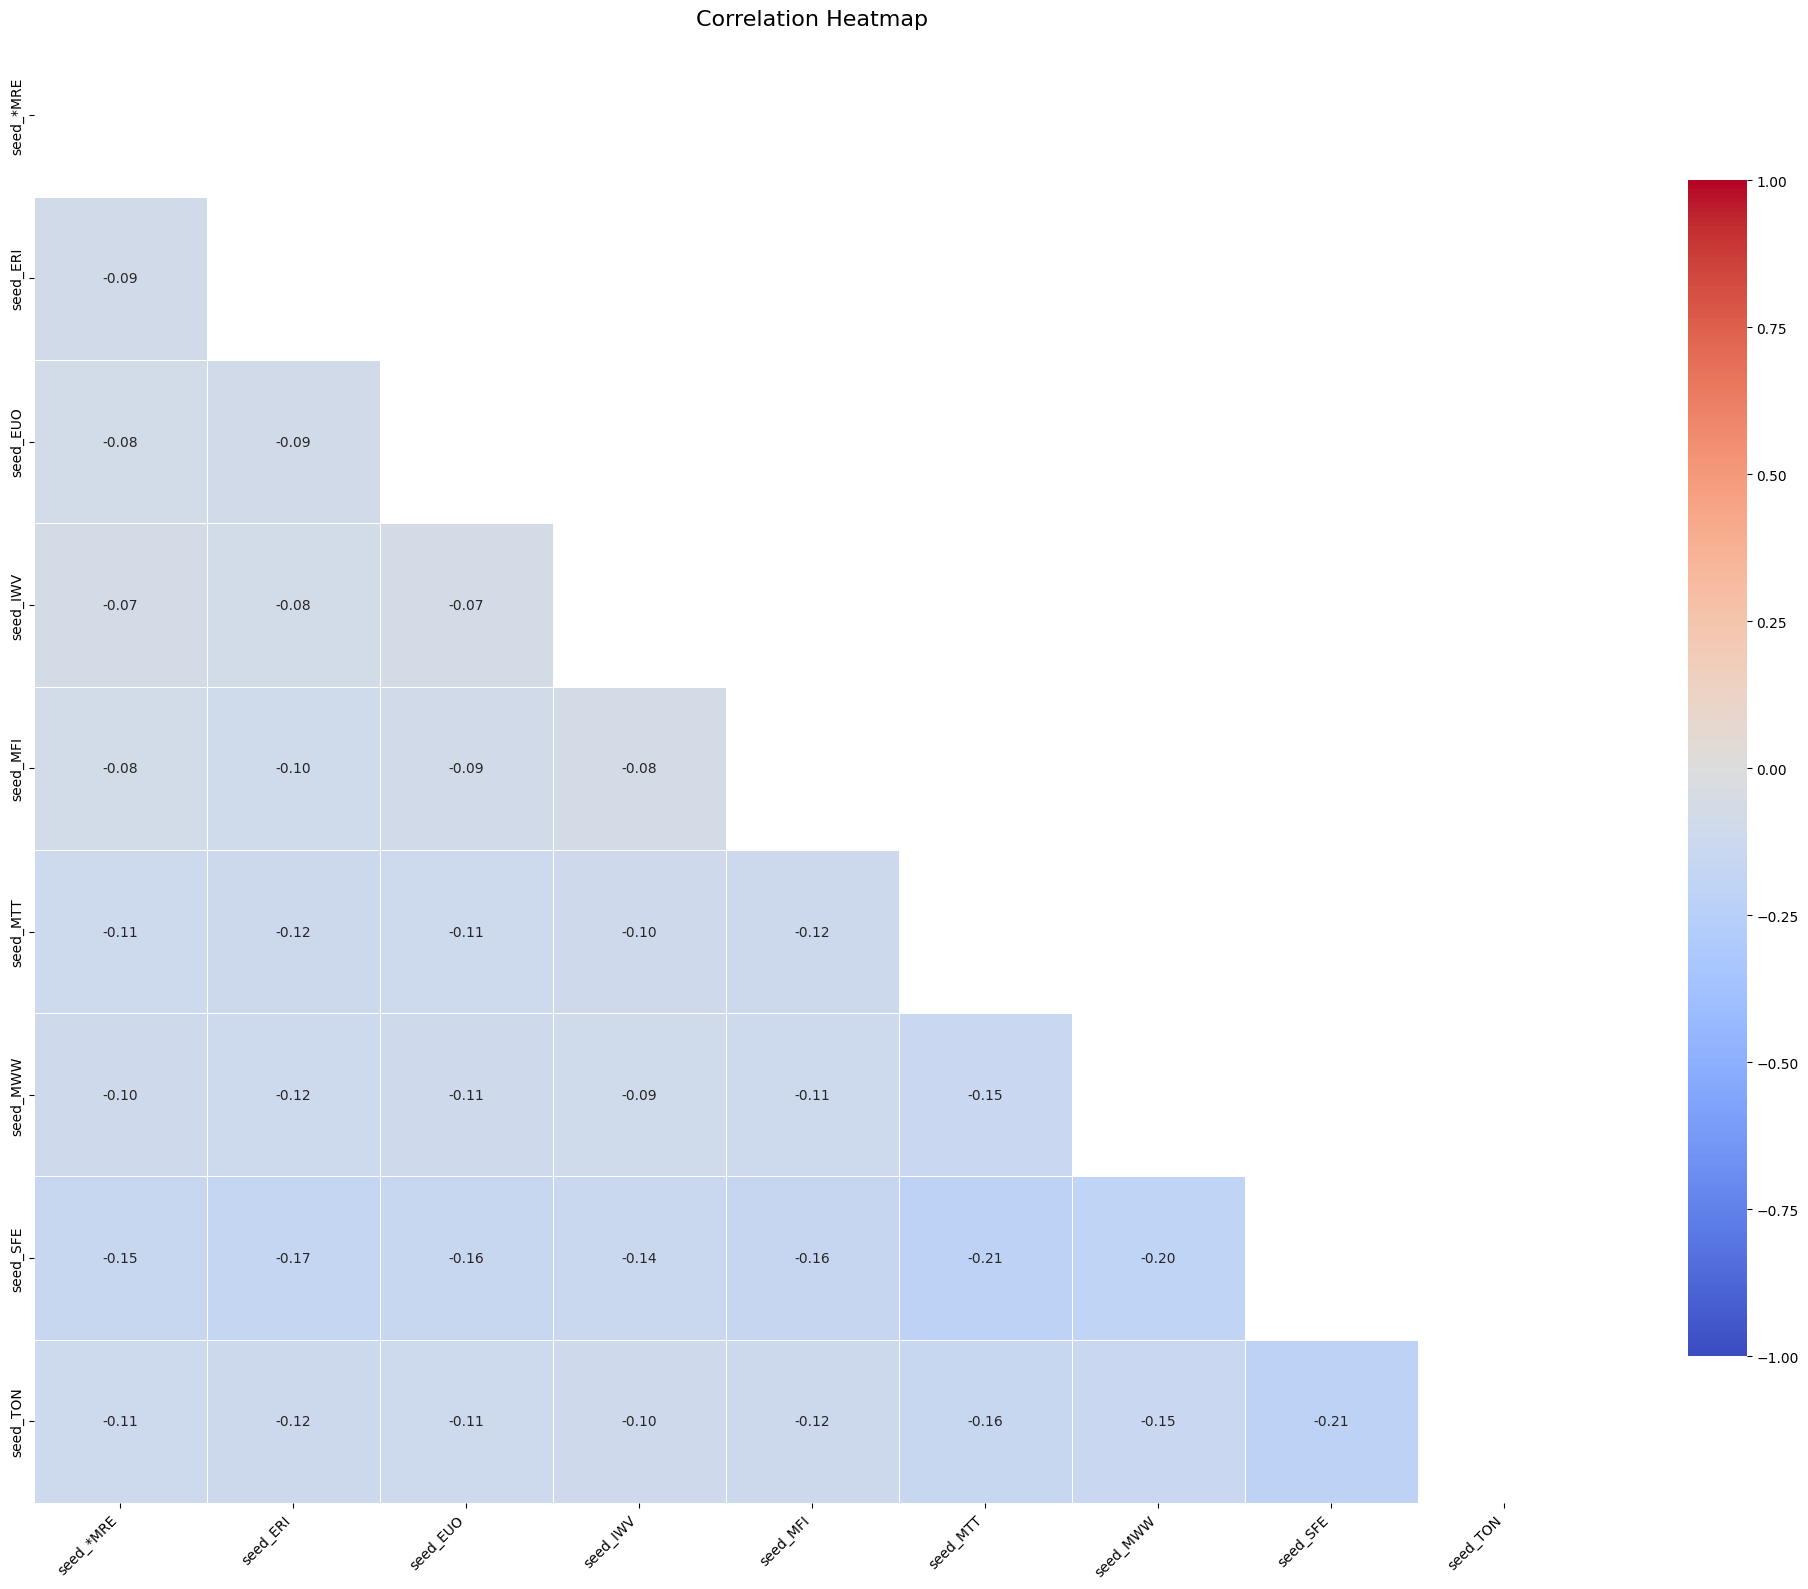

In [ ]:
# Correlation and Heatmap (for numerical data)
correlation_matrix = encoded_df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(20, 16) ) # Adjust the size for better readability

# Draw the heatmap
sns.heatmap(
    correlation_matrix,
    mask=mask,
    cmap='coolwarm',
    vmin=-1, vmax=1,
    annot=True,
    fmt=".2f",  # Limit decimal points
    linewidths=.5,
    cbar_kws={"shrink": 0.8}  # Adjust the color bar size
)

plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(fontsize=10, rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.yticks(fontsize=10)
plt.tight_layout()  # Automatically adjust spacing
plt.show()

## Machine Learning

Orienting the models

In [ ]:
# Check the columns available in the DataFrame
print("Available columns:", X.columns)

# Replace 'column_name' with the actual column name from the output
# For example:
# print(X['actual_column_name'].unique())



Available columns: Index(['SiO2', 'NaOH', 'SDA', 'B2O3', 'H2O', 'seed \namount',
       'temperature\n(°C)', 'time \n(day)', 'si/al\n(ICP-AES)', 'fd',
       'seed_*MRE', 'seed_ERI', 'seed_EUO', 'seed_IWV', 'seed_MFI', 'seed_MTT',
       'seed_MWW', 'seed_SFE', 'seed_TON'],
      dtype='object')


Non-numeric values detected in column 'si/al
(ICP-AES)'. Converting to numeric.
Missing values detected. Filling with column mean.
Scaler saved as 'scaler.pkl'.
Data preprocessing completed successfully.

Model Performance:

Logistic Regression:
Train Accuracy: 0.77, Test Accuracy: 0.73
Train R²: -0.05, Test R²: -0.42
Train RMSE: 0.48, Test RMSE: 0.52
Train MAE: 0.23, Test MAE: 0.27

Random Forest:
Train Accuracy: 1.00, Test Accuracy: 0.91
Train R²: 1.00, Test R²: 0.53
Train RMSE: 0.00, Test RMSE: 0.30
Train MAE: 0.00, Test MAE: 0.09

Support Vector Machine:
Train Accuracy: 0.83, Test Accuracy: 0.83
Train R²: 0.23, Test R²: 0.12
Train RMSE: 0.41, Test RMSE: 0.41
Train MAE: 0.17, Test MAE: 0.17

K-Nearest Neighbors:
Train Accuracy: 0.85, Test Accuracy: 0.79
Train R²: 0.31, Test R²: -0.08
Train RMSE: 0.39, Test RMSE: 0.46
Train MAE: 0.15, Test MAE: 0.21

Best model 'Random Forest' has been saved as 'best_model.pkl'.


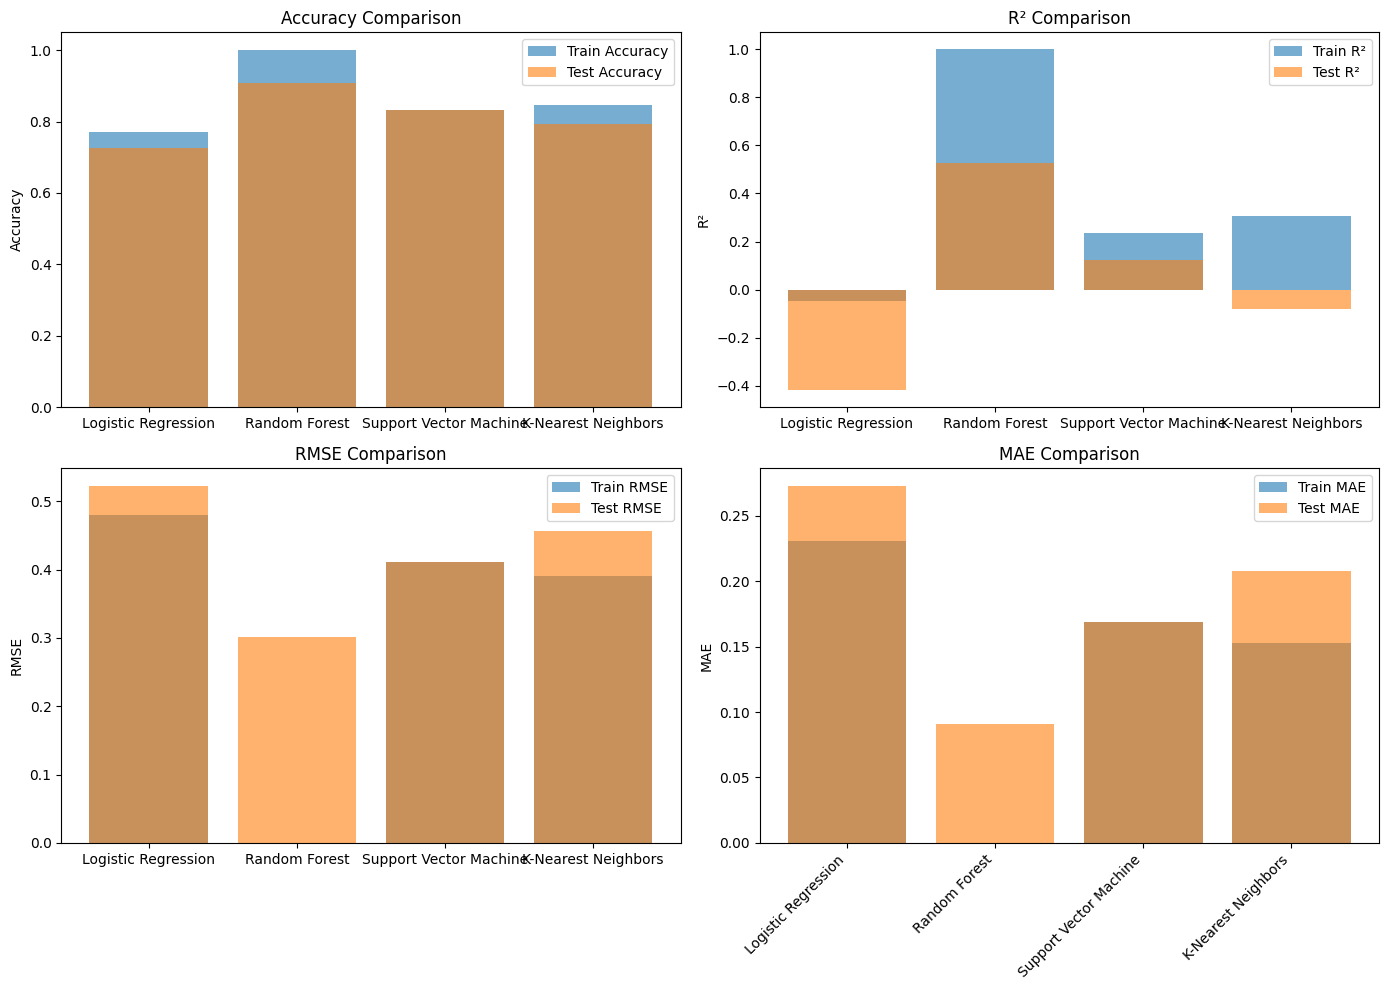

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib  # For saving the model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier  # Import KNN
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error, mean_squared_error, r2_score

# Splitting features and target
target_column = 'class'  # Replace with your target column name
if target_column not in data.columns:
    raise ValueError(f"Target column '{target_column}' not found in dataset!")

X = data.drop(columns=[target_column])
y = data[target_column]


# Identify and handle non-numeric data
for col in X.columns:
    if X[col].dtype == 'object':  # Check for non-numeric columns
        print(f"Non-numeric values detected in column '{col}'. Converting to numeric.")
        X[col] = pd.to_numeric(X[col], errors='coerce')  # Convert to numeric, replace invalid values with NaN

# Handle missing or invalid values
if X.isnull().sum().sum() > 0:
    print("Missing values detected. Filling with column mean.")
    X = X.fillna(X.mean())  # Replace NaNs with column means

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to your feature data (X) and transform the data
X_scaled = scaler.fit_transform(X)

# Save the scaler for later use
joblib.dump(scaler, 'scaler.pkl')

print("Scaler saved as 'scaler.pkl'.")

# Identify and handle non-numeric data
for col in X.columns:
    if X[col].dtype == 'object':  # Check for non-numeric columns
        print(f"Non-numeric values detected in column '{col}'. Converting to numeric.")
        X[col] = pd.to_numeric(X[col], errors='coerce')  # Convert to numeric, replace invalid values with NaN

# Check for missing or invalid values
if X.isnull().sum().sum() > 0:
    print("Missing or invalid values detected. Filling with column mean.")
    X = X.fillna(X.mean())

# Normalize the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Data preprocessing completed successfully.")

# Model Initialization
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier()  # Added KNN
}

# Store results for comparison
results = {
    "Model": [],
    "Train Accuracy": [],
    "Test Accuracy": [],
    "Train R²": [],
    "Test R²": [],
    "Train RMSE": [],
    "Test RMSE": [],
    "Train MAE": [],
    "Test MAE": []
}

# Train and evaluate models
print("\nModel Performance:")
best_score = 0
best_model_name = None
best_model = None

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on train and test data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Calculate R² (only for regression-based models, but it's included here for completeness)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    # Calculate MAE
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)

    # Store the results
    results["Model"].append(model_name)
    results["Train Accuracy"].append(train_accuracy)
    results["Test Accuracy"].append(test_accuracy)
    results["Train R²"].append(train_r2)
    results["Test R²"].append(test_r2)
    results["Train RMSE"].append(train_rmse)
    results["Test RMSE"].append(test_rmse)
    results["Train MAE"].append(train_mae)
    results["Test MAE"].append(test_mae)

    # Determine the best model based on Test Accuracy
    if test_accuracy > best_score:
        best_score = test_accuracy
        best_model_name = model_name
        best_model = model

    # Print the evaluation results for each model
    print(f"\n{model_name}:")
    print(f"Train Accuracy: {train_accuracy:.2f}, Test Accuracy: {test_accuracy:.2f}")
    print(f"Train R²: {train_r2:.2f}, Test R²: {test_r2:.2f}")
    print(f"Train RMSE: {train_rmse:.2f}, Test RMSE: {test_rmse:.2f}")
    print(f"Train MAE: {train_mae:.2f}, Test MAE: {test_mae:.2f}")

# Save the best performing model as a .pkl file
if best_model:
    joblib.dump(best_model, 'best_model.pkl')
    print(f"\nBest model '{best_model_name}' has been saved as 'best_model.pkl'.")
else:
    print("\nNo suitable model found to save.")

# Convert results into DataFrame for better visualization
results_df = pd.DataFrame(results)

# Plotting the results
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Accuracy Plot
axes[0, 0].bar(results_df['Model'], results_df['Train Accuracy'], label='Train Accuracy', alpha=0.6)
axes[0, 0].bar(results_df['Model'], results_df['Test Accuracy'], label='Test Accuracy', alpha=0.6)
axes[0, 0].set_title('Accuracy Comparison')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].legend()

# R² Plot
axes[0, 1].bar(results_df['Model'], results_df['Train R²'], label='Train R²', alpha=0.6)
axes[0, 1].bar(results_df['Model'], results_df['Test R²'], label='Test R²', alpha=0.6)
axes[0, 1].set_title('R² Comparison')
axes[0, 1].set_ylabel('R²')
axes[0, 1].legend()

# RMSE Plot
axes[1, 0].bar(results_df['Model'], results_df['Train RMSE'], label='Train RMSE', alpha=0.6)
axes[1, 0].bar(results_df['Model'], results_df['Test RMSE'], label='Test RMSE', alpha=0.6)
axes[1, 0].set_title('RMSE Comparison')
axes[1, 0].set_ylabel('RMSE')
axes[1, 0].legend()

# MAE Plot
axes[1, 1].bar(results_df['Model'], results_df['Train MAE'], label='Train MAE', alpha=0.6)
axes[1, 1].bar(results_df['Model'], results_df['Test MAE'], label='Test MAE', alpha=0.6)
axes[1, 1].set_title('MAE Comparison')
axes[1, 1].set_ylabel('MAE')
axes[1, 1].legend()

# Rotate x-axis labels for better visibility and adjust layout
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.show()


Cross validating the models

## Partial dependence plot

In [ ]:
print(X.columns)  # Lists all valid column names


Index(['SiO2', 'NaOH', 'SDA', 'B2O3', 'H2O', 'seed \namount',
       'temperature\n(°C)', 'time \n(day)', 'si/al\n(ICP-AES)', 'fd',
       'seed_*MRE', 'seed_ERI', 'seed_EUO', 'seed_IWV', 'seed_MFI', 'seed_MTT',
       'seed_MWW', 'seed_SFE', 'seed_TON'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/inspection/_plot/partial_dependence.py:976: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([min_val, max_val])


ValueError: cannot reshape array of size 1 into shape (2)

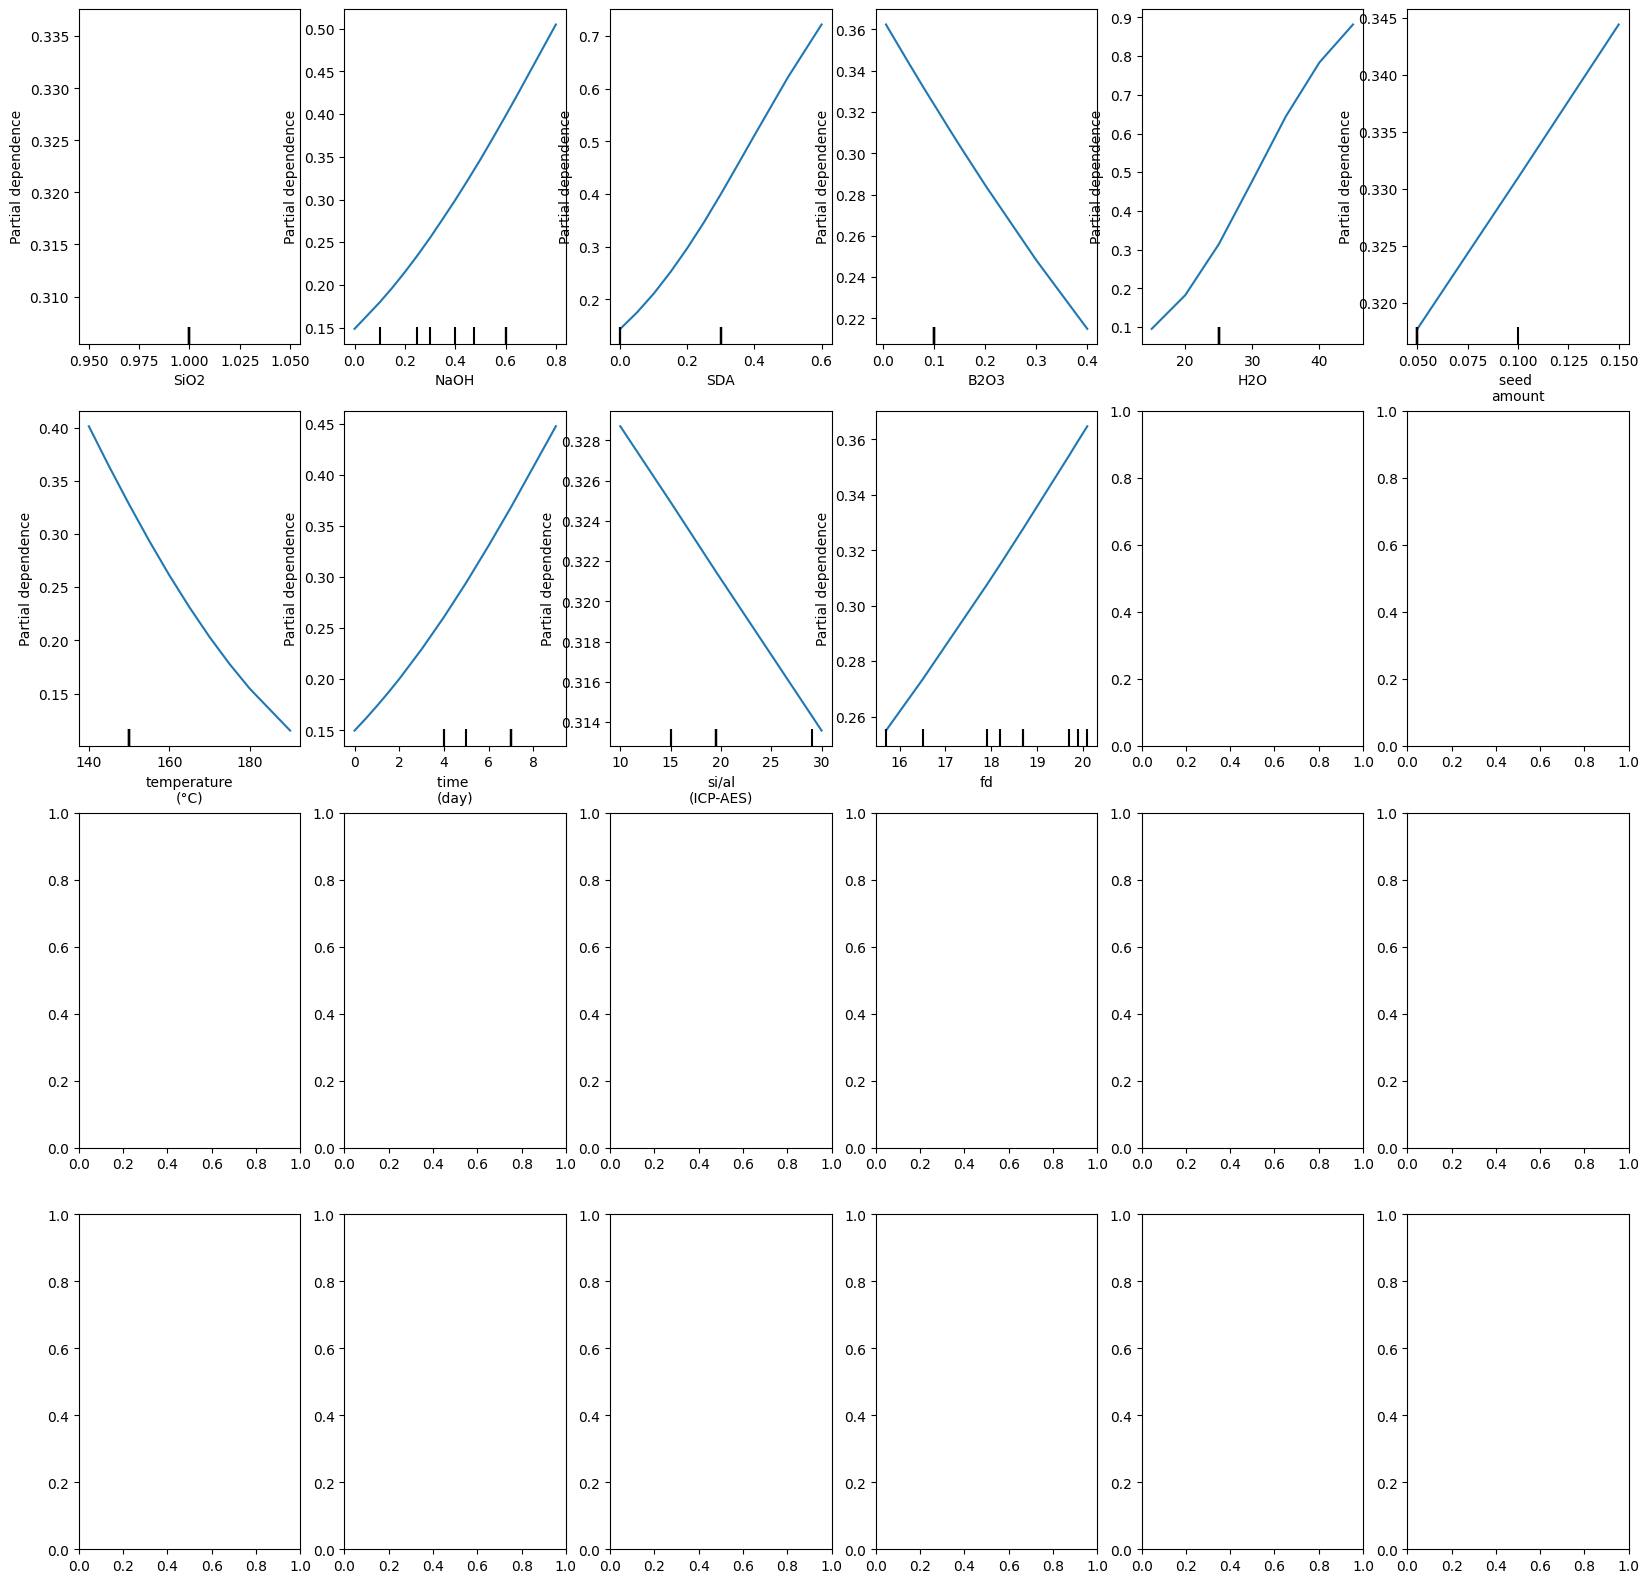

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.inspection import PartialDependenceDisplay
from sklearn.model_selection import train_test_split

# Ensure feature names match X columns
feature_names = [ 'SiO2', 'NaOH', 'SDA', 'B2O3', 'H2O', 'seed \namount',
       'temperature\n(°C)', 'time \n(day)', 'si/al\n(ICP-AES)', 'fd',
       'seed_*MRE', 'seed_ERI', 'seed_EUO', 'seed_IWV', 'seed_MFI', 'seed_MTT',
       'seed_MWW', 'seed_SFE', 'seed_TON'
]

# Verify the dataset columns align with the feature names
assert set(feature_names).issubset(X.columns), "Mismatch between dataset columns and feature names!"

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an SVM model
model = SVC(kernel='linear', probability=True, random_state=42)  # Use a linear kernel for interpretability
model.fit(X_train, y_train)

# Divide the features into smaller groups for better readability
features_per_plot = 6  # Number of features per row
num_features = len(feature_names)
num_rows = (num_features // features_per_plot) + (1 if num_features % features_per_plot != 0 else 0)

# Set up the figure for the PDPs grid
fig, axes = plt.subplots(num_rows, features_per_plot, figsize=(20, 5 * num_rows))
axes = axes.flatten()  # Flatten axes array for easy access

# Plot each feature in its respective subplot
for idx, feature in enumerate(feature_names):
    # Check if there are extra axes (in case of fewer features than axes)
    if idx >= len(axes):
        break
    ax = axes[idx]
    PartialDependenceDisplay.from_estimator(
        estimator=model,
        X=X_train,
        features=[feature],
        grid_resolution=50,  # Number of grid points
        kind='average',  # Average effect
        ax=ax  # Specific subplot axis
    )

    ax.tick_params(axis='both', labelsize=8)  # Reduce font size of tick labels
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)  # Make grid lines thinner and dashed

# Adjust layout to avoid overlap
plt.tight_layout(pad=4.0)  # Increase padding between plots to prevent overlap
plt.suptitle("Partial Dependence Plots for Breast Cancer Dataset", fontsize=16, y=1.05)
plt.subplots_adjust(hspace=0.7, wspace=0.4)  # Add space between rows and columns to avoid overlap
plt.show()
